In [1]:
import gradio as gr
import numpy as np
import tensorflow as tf



In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.mnist.load_data()


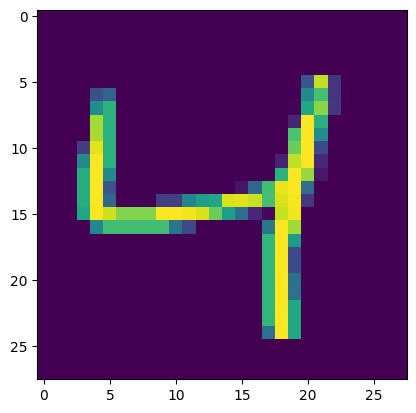

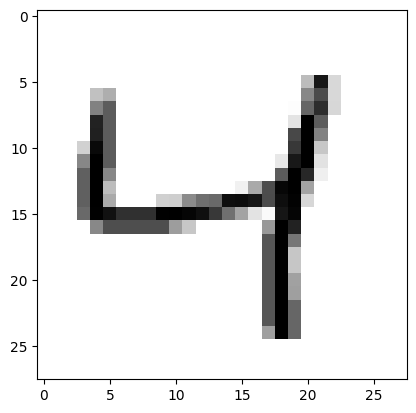

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[2],cmap=plt.cm.binary)

In [5]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [6]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - loss: 0.5875 - val_loss: 0.2055
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 0.1816 - val_loss: 0.1474
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 0.1217 - val_loss: 0.1303
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - loss: 0.0883 - val_loss: 0.1115
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - loss: 0.0666 - val_loss: 0.1030
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - loss: 0.0545 - val_loss: 0.1014
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.0407 - val_loss: 0.0986
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 0.0322 - val_loss: 0.1036
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 0.0282 - val_loss: 0.1038
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 0.0197 - val_loss: 0.1023


In [8]:
y_prob=model.predict(x_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step


array([[4.5848503e-09, 9.7871060e-13, 1.1231937e-08, ..., 9.9991393e-01,
        1.4038554e-10, 3.1882081e-09],
       [5.4960050e-11, 4.3981636e-05, 9.9995601e-01, ..., 1.0083487e-15,
        4.7297738e-10, 1.8123780e-17],
       [7.3234169e-08, 9.9998260e-01, 1.2973554e-06, ..., 3.6946692e-06,
        1.0651495e-05, 6.3535019e-08],
       ...,
       [4.6187991e-11, 7.8582040e-08, 2.1393111e-10, ..., 2.8947987e-05,
        1.5443629e-06, 1.8230134e-04],
       [4.3792525e-11, 9.0961362e-12, 1.8572149e-12, ..., 9.2082272e-11,
        2.9874480e-05, 1.8261918e-11],
       [1.5148741e-08, 5.5121672e-09, 3.9251127e-08, ..., 1.4286485e-12,
        4.1752143e-13, 7.7868416e-14]], dtype=float32)

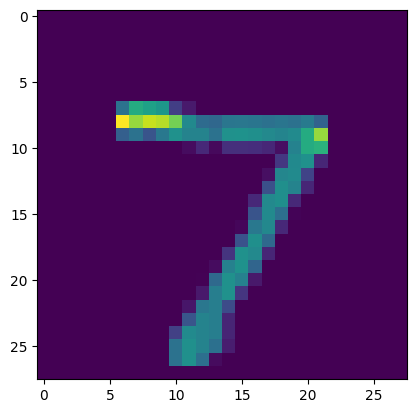

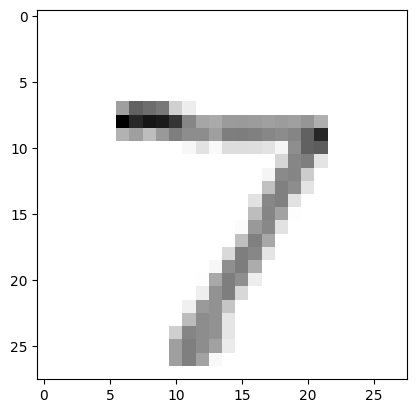

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
plt.show()
plt.imshow(x_test[0],cmap=plt.cm.binary)

In [10]:
y_pred=y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9737

In [13]:
def sketch_recog(img):
    x=model.predict(img.reshape(1,28,28)).argmax(axis=1)
    return x

In [ ]:
gr.Interface(fn=sketch_recog,inputs='sketchpad',outputs='text').launch(debug=True)

IMPORTANT: You are using gradio version 2.3.5, however version 4.44.1 is available, please upgrade.
--------
Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
